# Visualización con Machine Learning

# Problema de sesgo y varianza

### Contexto

El objetivo es diseñar una aplicación para predecir precios de casas en el mercado mediante un modelo de aprendizaje supervisado. Este modelo mapeará características de las casas, como número de cuartos, ubicación o amenidades, a un precio que refleje su valor. El propósito es construir un modelo de Machine Learning que aproxime esta función de precios utilizando datos de características y precios de los inmuebles.


### Error de Generalización

El error de generalización mide la diferencia entre los precios reales y las predicciones del modelo, siendo un indicador de su desempeño. Una métrica común en regresión es la raíz del error cuadrático medio (RMSE).

El error de generalización se divide en:
- **Error de entrenamiento**: Calculado con el conjunto de entrenamiento.
- **Error de prueba**: Calculado con el conjunto de prueba, clave para evaluar la efectividad del modelo en datos no vistos.

Este error se descompone en:
- **Error de sesgo**: Surge al usar modelos demasiado simples que no capturan la complejidad de los datos. Ejemplo: Usar un modelo lineal para datos no lineales.

- **Error de varianza**: Ocurre cuando los modelos son demasiado complejos y se ajustan excesivamente a los datos de entrenamiento. Ejemplo: Los árboles de decisión tienden a sobreajustar, aumentando el error en el conjunto de prueba.

- **Error irreducible**: Proviene del ruido inherente en los datos. Se puede mitigar limpiando datos, eliminando outliers o mejorando las variables predictoras.



### Resultado de las predicciones

Analizamos dos paneles (A) y (B) con gráficas de predicciones en el conjunto de prueba:

- **Panel (A)**: Predicciones del modelo lineal (colores diferentes).
- **Panel (B)**: Predicciones de 100 bosques aleatorios (colores diferentes).

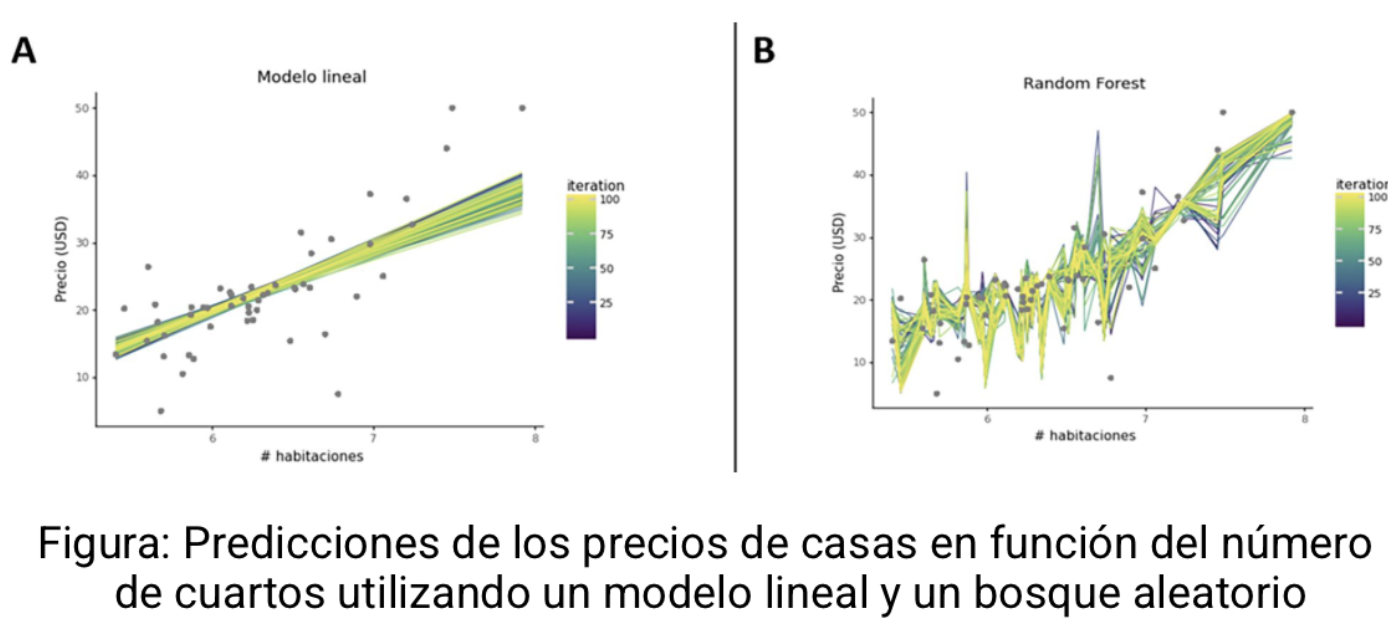

Reflexiona sobre:
- ¿Qué modelo tiene mayor sesgo?
- ¿Qué modelo tiene mayor varianza?
- ¿Qué modelo tiene mayor error de generalización?
- ¿Qué modelo es más confiable para implementar?

El objetivo es seleccionar un modelo con el menor sesgo y varianza posible, considerando el trade-off entre ambos. 

    - El error de generalización se minimiza cuando hay un balance entre sesgo y varianza.
    - Mayor complejidad → Aumenta varianza, reduce sesgo.
    - Menor complejidad → Reduce varianza, aumenta sesgo.

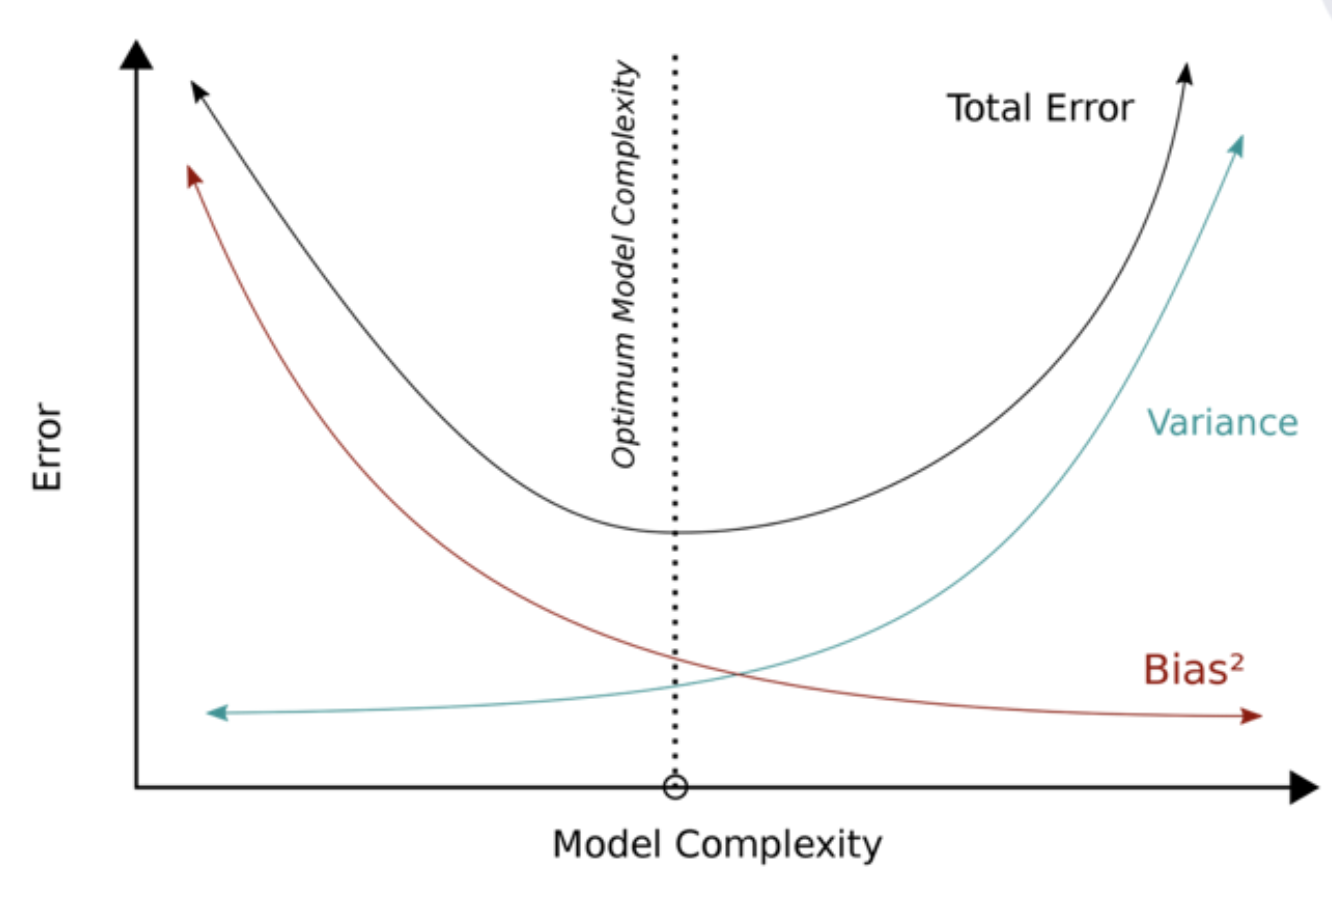


### Modelo de Predicción

En el modelo de predicción de precios de casas, como en cualquier problema de aprendizaje supervisado, es crucial encontrar un equilibrio entre el sesgo y la varianza para minimizar el error de generalización utilizando los datos de prueba.

Este proceso es iterativo y requiere tiempo, pero existen diversas técnicas para evitar el sobreajuste y mejorar el desempeño del modelo:

- **División de datos**: Separar los datos en conjuntos de entrenamiento, validación y prueba.
- **Validación cruzada**: Utilizar técnicas como k-fold cross-validation para seleccionar los mejores hiperparámetros.
- **Regularización**: Aplicar técnicas como Lasso, Ridge o Elastic Net para penalizar la complejidad del modelo.
- **Selección de modelos adecuados**: Elegir modelos que se ajusten mejor a la estructura de los datos.
- **Ingeniería de características**: Crear o transformar variables predictoras para mejorar su capacidad explicativa.

El objetivo final es construir un modelo que generalice bien, logrando un balance óptimo entre sesgo y varianza, y que sea capaz de realizar predicciones precisas en datos no vistos.


## Construccrión de conjunto de entrenamiento y prueba

Hasta ahora, has analizado que, para construir un modelo de aprendizaje supervisado que produzca predicciones precisas y consistentes, es fundamental minimizar el error de generalización en el conjunto de prueba, logrando un equilibrio entre el error de sesgo y varianza.

Es crucial establecer pautas claras para construir los conjuntos de entrenamiento, validación y prueba, con el fin de entrenar y evaluar adecuadamente los modelos de aprendizaje supervisado.

En el contexto del problema de predicción de precios de casas, trabajaremos con el conjunto de datos públicos **Boston Housing Prices**, que incluye las siguientes características de las propiedades:

- **CRIM**: Tasa de criminalidad per cápita en la localidad.​
- **ZN**: Proporción de zona residencial para lotes de más de 25,000 pies cuadrados.​ 
- **INDUS**: Proporción de la superficie en acres de negocios no relacionados con retail por localidad.​
- **CHAS**: Variable dicotómica que indica si la propiedad colinda con el Río Charles (1: sí, 0: no).​
- **NOX**: Concentración de óxido de nitrógeno (partes por 10 millones).​
- **RM**: Número promedio de habitaciones por vivienda.​
- **AGE**: Proporción de unidades habitacionales construidas antes de 1940.
- **DIS**: Distancias ponderadas entre cinco centros de trabajo en Boston.​
- **RAD**: Índice de accesibilidad a autopistas.​
- **TAX**: Tasa impositiva sobre el valor de la propiedad por cada 10,000 dólares.​
- **PTRATIO**: Relación de estudiantes por profesor en la localidad.​
- **B**: Proporción de personas de raza afroamericana.​
- **LSTAT**: Porcentaje de la población con menor estatus socioeconómico.​
- **MEDV**: Mediana del precio de las casas ocupadas (en miles de dólares).

La variable dependiente en este problema es **MEDV**, que representa la mediana de los precios de las casas ocupadas. Este conjunto de datos será clave para entrenar y evaluar el modelo de predicción.


#### Tipos de conjuntos

En el flujo de trabajo de modelación, el primer paso es particionar los datos en tres conjuntos principales, como se muestra en la imagen. Cada conjunto tiene un propósito específico:

- **Conjunto de entrenamiento**: Se utiliza para entrenar el modelo.
- **Conjunto de validación**: Permite evaluar el desempeño del modelo, seleccionar los mejores hiperparámetros y compararlo con otros modelos. Aunque este conjunto es opcional, es una buena práctica incluirlo para optimizar el modelo sin tocar el conjunto de prueba.
- **Conjunto de prueba**: Se utiliza para evaluar el modelo final. El error de generalización calculado con este conjunto es el que se reporta al final del proceso de modelación.

#### Reflexión

Con base en esta información, reflexiona sobre las siguientes preguntas:

1. ¿Del 100% de los datos, cuántos deben ser utilizados para entrenamiento, validación y prueba?
2. ¿Cuáles son las consecuencias de tener pocos datos de entrenamiento?

No existe una proporción única para dividir los datos, ya que esto depende de factores como la cantidad de datos disponibles, el tipo de modelo y la relación señal-ruido en los datos. Sin embargo:

- Si tienes pocos datos de entrenamiento, la varianza de los parámetros será muy alta.
- Si tienes pocos datos de prueba, la varianza del error de prueba será muy alta.

Un punto de partida común es dividir los datos en un 80% para entrenamiento y un 20% para prueba (80:20). Si dispones de muchos datos, puedes optar por una división como 50% para entrenamiento, 25% para validación y 25% para prueba (50:25:25).

#### Buenas prácticas

Una buena práctica es construir estos conjuntos seleccionando las observaciones de manera aleatoria del conjunto de datos original. Esto ayuda a evitar sesgos de selección y garantiza que los conjuntos sean representativos.

En Python, una forma eficiente de construir estos conjuntos es utilizando la función `train_test_split` de la biblioteca `sklearn`. A continuación, se muestra un ejemplo de cómo dividir los datos en:

- **Conjunto de entrenamiento**: 80% de los datos (`X_train`, `y_train`).
- **Conjunto de validación**: 10% de los datos (`X_val`, `y_val`).
- **Conjunto de prueba**: 10% de los datos (`X_test`, `y_test`).

La función `train_test_split` permite especificar el tamaño del conjunto de prueba o validación mediante el parámetro `test_size`, que puede ser una proporción o un número de observaciones. Por ejemplo:

- 20% de las observaciones totales: `test_size = 0.20`
- 51 observaciones: `test_size = 51`

Además, para seleccionar las observaciones de manera aleatoria, puedes utilizar el parámetro `shuffle=True`. La función siempre devuelve cuatro arreglos: `X_train`, `X_test`, `y_train`, y `y_test`.



In [ ]:
from sklearn.model_selection import train_test_split

# Paso 1: Dividir el conjunto de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,y
    test_sixe = 0.10
    random_state=seed
    shuffle= True # Construir los conjuntos utilizando aleatorizacion
)

#Paso 2: Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full
    test_size=51, 
    random_state=seed,
    shuffle= False,
)

#### Consideraciones para Construir Conjuntos de Entrenamiento, Validación y Prueba

Al construir los conjuntos de datos para un modelo de aprendizaje supervisado, es importante tener en cuenta los siguientes aspectos:

1. **Cantidad de Datos Disponibles**  
    - ¿Existen suficientes datos para dividirlos en tres conjuntos (entrenamiento, validación y prueba)?  
    - Si los datos son limitados, puedes omitir el conjunto de validación y utilizar técnicas como validación cruzada.

2. **Muestreo Aleatorio**  
    - ¿Es posible construir los conjuntos utilizando muestreo aleatorio de las observaciones?  
    - Si los datos tienen una estructura temporal (por ejemplo, series de tiempo), seleccionar observaciones aleatoriamente podría no ser adecuado. En este caso, considera particionar los datos respetando su secuencia temporal.

3. **Contexto de las Predicciones**  
    - ¿Cómo se realizan las predicciones en la vida real?  
      - ¿Por cliente, transacción, segmento, o algún otro criterio?  
    - Asegúrate de que la partición de los datos refleje este contexto para que el modelo sea representativo.

4. **Distribución de Clases (en Problemas de Clasificación)**  
    - ¿Los conjuntos de entrenamiento, validación y prueba mantienen la misma proporción de clases que se observa en la vida real?  
    - Si no es así, utiliza técnicas como muestreo estratificado para garantizar que las proporciones sean consistentes.

5. **Preprocesamiento y Partición**  
    - Antes de particionar los datos, analiza cómo se realizarán las predicciones en la práctica.  
    - Con base en este análisis, define el preprocesamiento y la estrategia de partición más adecuada.

Recuerda que una partición adecuada de los datos es clave para garantizar que el modelo generalice bien y sea capaz de realizar predicciones precisas en datos no vistos.


### Validación Cruzada

En el subtema anterior, aprendiste que, para entrenar y evaluar un modelo, es fundamental particionar los datos en tres conjuntos: entrenamiento, validación y prueba. En el caso de la predicción de precios de casas, construimos estos conjuntos utilizando aleatorización. Sin embargo, los resultados de validación y prueba pueden variar dependiendo de cómo se calculen los parámetros del modelo con los datos de entrenamiento. Ahora exploraremos cómo utilizar nuestros datos dentro de un esquema de validación cruzada.

El principal problema de evaluar un modelo únicamente con los datos de entrenamiento es que no se puede controlar qué sucedería si el conjunto de entrenamiento cambiara. Como observaste, al modificar el conjunto de entrenamiento, se pueden obtener funciones predictivas (ƒ) muy diferentes, lo que indica que el modelo tiene un problema de alta varianza.

Una solución a este problema es la **validación cruzada**, una técnica que permite dividir el conjunto de entrenamiento en varios subconjuntos de entrenamiento y validación. Esto permite evaluar el desempeño del modelo de manera más robusta. La idea principal es obtener un indicador promedio del desempeño del modelo al variar el conjunto de entrenamiento. Este indicador proporciona una estimación más realista del error de validación y/o prueba, ayudando a seleccionar un modelo que generalice mejor.


##### Validación Cruzada (k-Fold)

La validación cruzada es una técnica que consiste en dividir el conjunto de entrenamiento en **k subconjuntos** diferentes, llamados “folds”. Por lo general, estos folds tienen el mismo tamaño y se construyen utilizando aleatorización. 

El proceso implica entrenar el modelo **k veces**, donde en cada iteración:
- Un fold diferente se utiliza como conjunto de validación para evaluar el modelo.
- Los **k–1 folds restantes** se utilizan como conjunto de entrenamiento.

Este enfoque permite evaluar el desempeño del modelo de manera más robusta, ya que cada observación del conjunto de datos se utiliza tanto para entrenamiento como para validación, pero nunca al mismo tiempo.

#### Buenas Prácticas
- Es común utilizar **5 o 10 folds** (5-fold o 10-fold cross-validation), aunque el número de folds puede variar dependiendo del tamaño del conjunto de datos y del problema específico.
- Un mayor número de folds puede proporcionar una estimación más precisa del desempeño del modelo, pero también incrementa el costo computacional.

La validación cruzada es una herramienta poderosa para seleccionar modelos y ajustar hiperparámetros, ya que ayuda a reducir el riesgo de sobreajuste y proporciona una estimación más confiable del error de generalización.


#### Aplicación de Validación Cruzada

En la figura se ilustra cómo aplicar la validación cruzada con **k=5 folds** a un conjunto de entrenamiento.

El proceso consiste en entrenar el modelo **5 veces**, dividiendo el conjunto de entrenamiento en 5 particiones (folds). En cada iteración:

- Los **folds 2 a 5** (en amarillo) se utilizan para entrenar el modelo.
- El **fold 1** (en verde) se utiliza para validar el modelo.

Este procedimiento se repite cambiando el fold de validación en cada iteración, asegurando que cada partición sea utilizada tanto para entrenamiento como para validación. 

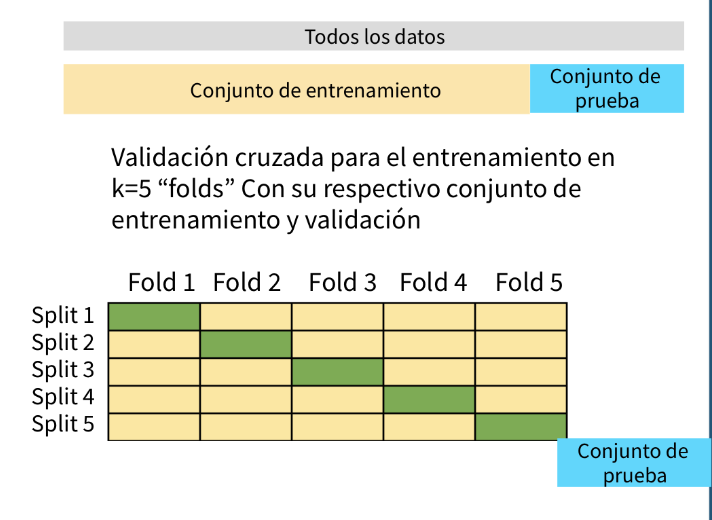

La validación cruzada permite evaluar el desempeño del modelo de manera más robusta, sin necesidad de tocar el conjunto de prueba, proporcionando una estimación más confiable del error de generalización.

#### Conjunto de Validación

En la validación cruzada, el conjunto de validación cambia en cada iteración. Por ejemplo:
- En el **split 2**, se utiliza el **fold 2** como conjunto de validación y el resto como conjunto de entrenamiento.
- En el **split 3**, se utiliza el **fold 3** como conjunto de validación, y así sucesivamente.

Para cada conjunto de validación (en verde), se calcula una métrica de evaluación, como la **raíz del error cuadrático medio (RMSE)**. Esto genera múltiples errores de validación (uno por cada split), que se promedian para obtener el **error promedio de validación cruzada**. Además, se puede calcular la **desviación estándar** para medir la dispersión de los errores entre los diferentes splits.

Esta técnica no solo es útil para evaluar modelos, sino también para experimentar con diferentes modelos e hiperparámetros. A continuación, se describen los parámetros clave que debes considerar al usar `cross_val_score` de `sklearn` para realizar validación cruzada:

- **`estimator`**: El modelo de sklearn que deseas evaluar, por ejemplo, `LinearRegression()`.
- **`cv`**: El número de folds (k) en los que deseas dividir el conjunto de entrenamiento. Por ejemplo, para k=5, se especifica como `cv=5`.
- **`scoring`**: La métrica de evaluación. Para calcular el RMSE, se utiliza `scoring='neg_root_mean_squared_error'`. Nota: sklearn devuelve el negativo del RMSE debido a cómo está diseñada la API. Por lo tanto, es necesario multiplicar los resultados por –1 para obtener el RMSE positivo.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

linear_reg = LinearRegression(normalize=True)
#Calcular el error de validacion cruzada

scores = cross_val_score(
    linear_reg, #Modelo
    X_train, # X de entrenamiento
    y_train, # y de entrenamiento
    cv = 10,  #K-splits
    scoring = 'neg_root_mean_squared_error' # Meritrica de evaluacion
)

#### Cálculo del RMSE

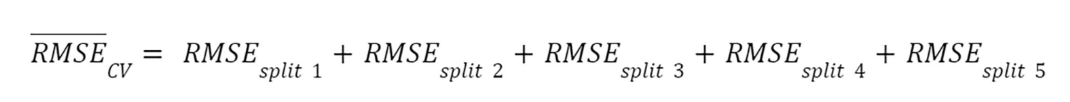

La función `cross_val_score` calcula el RMSE para cada conjunto de validación en los k-splits y devuelve estos valores. A partir de estos resultados, puedes calcular:
- El **promedio del RMSE** para obtener el error de validación cruzada promedio.
- La **desviación estándar del RMSE** para medir la dispersión de los errores.

Puedes utilizar la siguiente función para imprimir el RMSE de cada k-fold, el promedio y la desviación estándar. Esta función ya multiplica por –1 los errores para obtener el RMSE positivo:


In [ ]:
# Imprimir errores de validacion cruzada
def fun_print_cross_validation_error(scores):
    # Imprimir resultados del error de validación para cada split​
    print("Error de entrenamiento (RMSE):")
    [print(f"- Split-{k}: {np.round(-1*error,2)}") for k, error in enumerate(scores) ]
    # Imprimir el error promedio y desviación estándar de validación cruzada​
    print("\nCross validation error (RMSE):")​
    print(f"- Error promedio: {np.round(np.mean(-1*scores),2)}")
    print(f"- Desviación estándar del error: {np.round(np.std(-1*scores),2)}")

fun_print_cross_validation_error(scores)

#### Evaluacion
Ahora evaluemos este modelo en el conjunto de validación y en el conjunto de prueba.

In [ ]:
from sklearn.metrics import mean_squared_error
# Imprimir error de predicción​
def fun_print_error(X_train, X_test, y_train, y_test):
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    print(f"- Error promedio (RMSE): {rmse}")
 
# Imprimir error en conjunto de validación​
fun_print_error(
    X_train, 
    X_val, 
    y_train, 
    y_val
)
​
# Imprimir el error en el conjunto de prueba​
fun_print_error(
    X_train, 
    X_test, 
    y_train,
    y_test
)

# Construcción de un flujo de trabajo para problemas de regresion

## Extracción y selección de variables

En cuanto a la extracción y selección de variables, es necesario abordar el dataset del Boston Housing, pues permite construir máquinas inteligentes con la capacidad para predecir el precio de casas en función de sus características.

Hasta el momento, has podido analizar la importancia de particionar los datos en conjuntos similares de entrenamiento, validación y prueba, utilizando aleatorización. Asimismo, has podido distinguir cómo la validación cruzada permite tener un mejor estimador del error de generalización del conjunto de prueba.

Retomando el escenario planteado, donde utilizamos un modelo lineal con un conjunto de técnicas que permitieron obtener un error de generalización en el conjunto de validación de 5.49 miles/USD, y de 3.99 miles/USD en el de prueba.

- Error promedio de validación (RMSE): 5.49 
- Error promedio de prueba (RMSE): 3.99


A partir de esta información, reflexiona sobre los siguientes cuestionamientos:
¿Si tuvieras que presentar estos resultados sobre el desempeño del modelo a la mesa directiva ¿estarías satisfecho?
¿Existen aspectos de mejora?

La información sugiere que es muy grande y variable el error en ambos conjuntos, pues se habla de miles/USD. Sin embargo, este primer resultado sirve para establecer un punto de partida para mejorar el modelo.

Si bien, no existe una receta para que construir una máquina con el menor error posible, sí hay varias alternativas para disminuir el error de generalización de un modelo. Por ejemplo:

Aplicar transformaciones a las variables existentes o crear nuevas variables.
Utilizar ingeniería de características, para ver cuáles de estas permiten generalizar mejor los datos.


### Transformaciones de Variables

Para mejorar el desempeño del modelo de regresión lineal, es fundamental analizar la distribución de los datos crudos. A continuación, se describe el proceso y los resultados obtenidos al aplicar transformaciones a las variables del dataset.

#### Distribución de las Variables

El histograma de las variables cuantitativas del dataset muestra que muchas de ellas son altamente asimétricas y no siguen una distribución normal. Este comportamiento afecta negativamente el ajuste del modelo de regresión lineal, ya que este asume una relación lineal entre las variables.

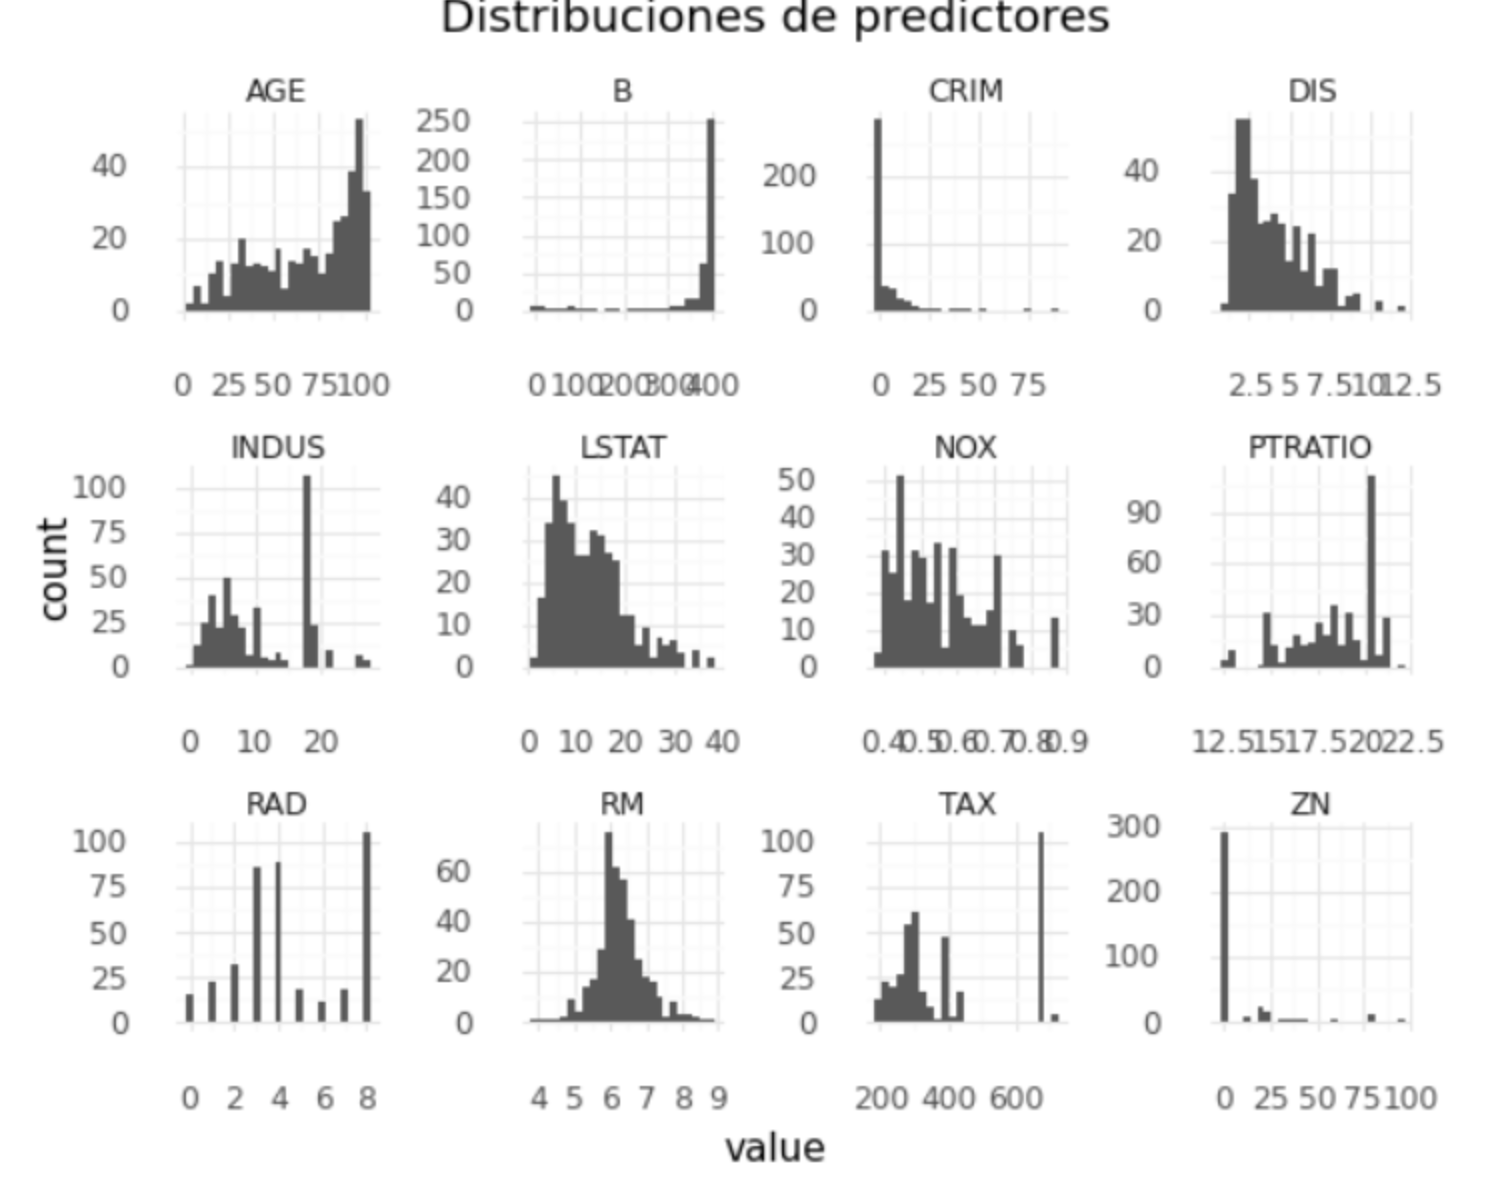

#### Aplicación de Transformaciones

Para corregir la asimetría en los datos, se puede aplicar una transformación logarítmica tanto a la variable dependiente como a los predictores. La fórmula utilizada es:

$$
\text{log\_variable} = \ln(\text{variable} + 1)
$$

**¿Por qué sumar +1 antes de aplicar el logaritmo?**  
Esto se hace para evitar problemas con valores de cero, ya que el logaritmo de cero no está definido. Esta práctica no altera significativamente los resultados.

#### Resultados de las Transformaciones

Después de aplicar la transformación logarítmica, se observa una mejora en la distribución de las variables. Por ejemplo:
- Las variables **DIS**, **INDUS**, **LSTAT** y **RM** muestran un comportamiento más cercano a una distribución normal.
- Las variables **NOX**, **PTRATIO** y **TAX** también presentan una ligera mejora.

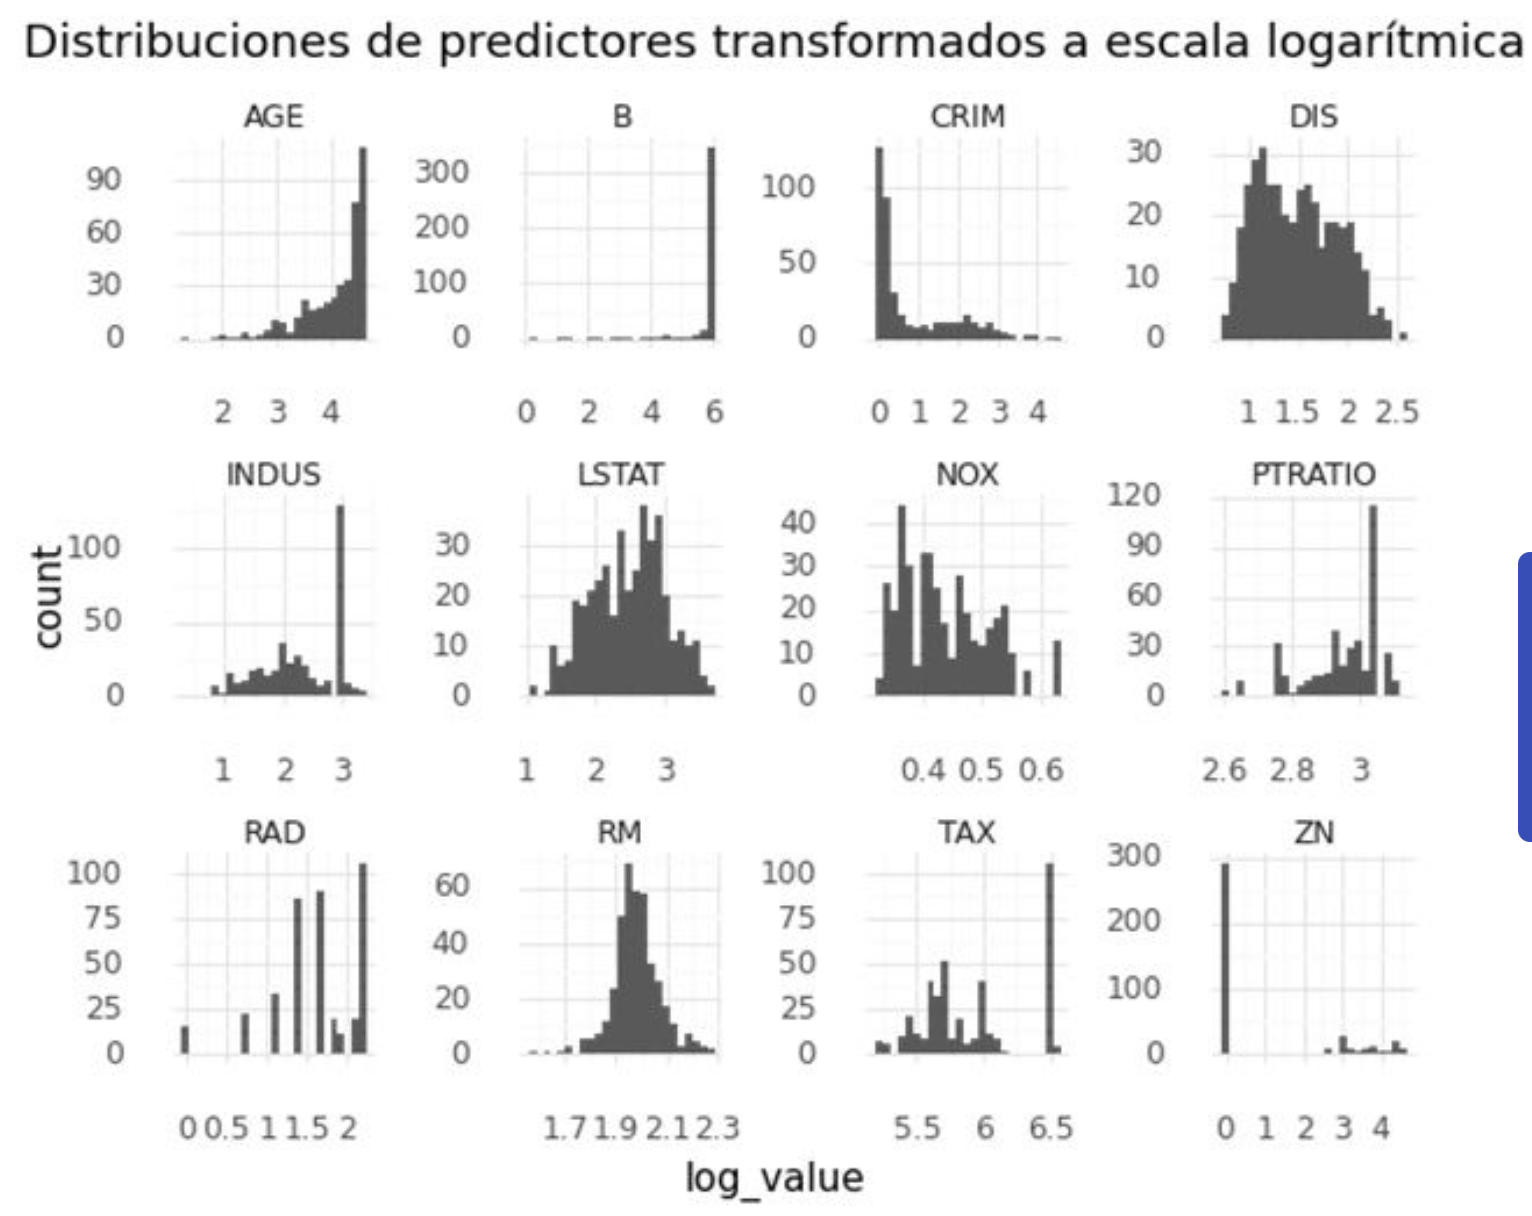

#### Ajuste del Modelo LOG-LOG

Con las variables transformadas, se ajustó un modelo lineal (LOG-LOG) y se calcularon los errores de validación y prueba. Los resultados fueron los siguientes:

- **Error promedio de validación (RMSE):** 0.2214 miles/USD  
- **Error promedio de prueba (RMSE):** 0.1972 miles/USD  

Estos resultados representan una mejora sustancial en comparación con el modelo base.

#### Reconversión de Resultados

Dado que los resultados del modelo LOG-LOG están en escala logarítmica, es necesario reconvertirlos a la escala original (miles/USD) para interpretarlos correctamente. La fórmula utilizada para esta reconversión es:

$$
\text{variable} = e^{\text{log\_variable}} - 1
$$

#### Reflexión

Con base en los resultados obtenidos, considera las siguientes preguntas:
1. ¿Utilizarías este modelo para la aplicación de la empresa y su problema de predicción de precios de casas?  
2. ¿La magnitud del error es aceptable para el negocio? ¿Por qué?  
3. ¿Qué otras transformaciones podrían mejorar el desempeño del modelo? ¿Cómo podrían implementarse?

El modelo LOG-LOG muestra una mejora significativa en el error de generalización, lo que lo convierte en una opción prometedora. Sin embargo, es importante evaluar si la magnitud del error es adecuada para los objetivos del negocio y explorar otras posibles transformaciones que puedan optimizar aún más el desempeño del modelo.


### Creación de Interacciones entre Variables

Una técnica avanzada de ingeniería de características es la **creación de interacciones entre variables**. Estas interacciones representan combinaciones de predictores que pueden capturar relaciones más complejas en los datos, las cuales son difíciles de identificar de manera directa.

#### Ejemplo de Interacciones

En el caso del precio de una casa, este puede depender del número de habitaciones (**RM**) y de la proporción de zona residencial en el área (**ZN**). Sin embargo, la relación entre estas variables puede no ser independiente. Por ejemplo:
- El impacto del número de habitaciones en el precio puede variar según la proporción de zona residencial.
- De manera similar, la influencia de la proporción de zona residencial puede depender del número de habitaciones.

Para capturar esta interacción, se puede incluir un término adicional que represente el producto de ambas variables:

$$
\text{MEDV} = \text{RM} + \text{ZN} + (\text{RM} \times \text{ZN}) + \text{error}
$$

#### Construcción de Interacciones en Modelos

- En **modelos lineales**, estas interacciones deben ser construidas explícitamente como nuevas variables.
- En **modelos basados en árboles** o **Deep Learning**, estas interacciones suelen ser identificadas y modeladas automáticamente.

#### Automatización con `PolynomialFeatures`

En Python, puedes construir interacciones de manera automática utilizando la clase `PolynomialFeatures` de `sklearn`. Esta herramienta permite generar polinomios y/o interacciones de las variables hasta el grado especificado. A continuación, se describen los parámetros clave:

- **`degree=2`**: Genera polinomios e interacciones de hasta grado 2.
- **`interaction_only=True`**: Calcula únicamente las interacciones entre variables, omitiendo los términos elevados al grado especificado.
- **`include_bias=False`**: Evita agregar un término constante igual a 1, ya que este será manejado por el modelo.
- **`fit(X_train_log)`**: Ajusta el transformador a los datos de entrenamiento (en este caso, los datos transformados).
- **`get_feature_names()`**: Recupera los nombres de las columnas generadas, incluyendo las interacciones.

#### Beneficio de las Interacciones

La creación de interacciones permite capturar relaciones no lineales entre las variables, mejorando el desempeño de los modelos lineales. Esto es especialmente útil en problemas donde las relaciones entre los predictores y la variable objetivo son complejas.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures  

# Especificar cómo queremos las interacciones
poly = PolynomialFeatures(
degree=2, interaction_only=True,
include_bias = False
)

# Pasar los datos de entrenamiento
poly = poly.fit(X_train_log)
nombres_columnas = poly.get_feature_names()

# Construir los conjuntos de entrenamiento, validación y prueba con interacciones
X_train_log_poly = pd.DataFrame(poly.transform(X_train_log), columns = nombres_columnas)

X_val_log_poly = pd.DataFrame(poly.transform(X_val_log), columns = nombres_columnas)

X_test_log_poly = pd.DataFrame(poly.transform(X_test_log), columns = nombres_columnas)

Cuando la matriz de predictores tiene más columnas que renglones, algunos métodos de aprendizaje supervisado enfrentan dificultades para converger a una solución óptima. En estos casos, es recomendable construir interacciones de manera estratégica, basándose en un conocimiento profundo del problema de negocio, para evitar incluir interacciones irrelevantes que puedan degradar el desempeño del modelo.

#### Consideraciones Clave:
1. **Modelos Lineales y Variables Irrelevantes**  
    En modelos como la regresión lineal, incluir variables que no aportan información relevante puede degradar el desempeño del modelo, aumentando el error de predicción. Esto ocurre porque el modelo intenta ajustar el ruido presente en las variables irrelevantes.

2. **Costo Computacional**  
    Cuando se trabaja con grandes volúmenes de datos y un número elevado de predictores, ajustar modelos puede requerir más tiempo y recursos computacionales, lo que puede ser ineficiente si muchas de las variables no son útiles.

#### Observaciones del Modelo Ajustado con 91 Predictores:
Al ajustar un modelo lineal con 91 predictores, se observó lo siguiente:
- **Error de Validación:** Empeoró ligeramente, lo que sugiere que algunas interacciones incluidas no aportan valor predictivo y generan ruido.
- **Error de Prueba:** Mejoró marginalmente, indicando que el modelo logra capturar algunas relaciones útiles, aunque el impacto es limitado.

#### Resultados:
- **Error promedio de validación (RMSE):** 0.25  
- **Error promedio de prueba (RMSE):** 0.16  

Aunque la mejora en el error de prueba es marginal, es importante reflexionar sobre la relevancia de las interacciones incluidas. Una estrategia más enfocada en la selección de variables relevantes podría mejorar tanto el desempeño del modelo como la eficiencia computacional.

### Selección de Variables: Método de Correlación con la Variable Dependiente

Cuando se trabaja con un gran número de variables, es fundamental incluir únicamente aquellas que aporten valor predictivo a la variable dependiente. Esto implica eliminar variables que no tengan poder explicativo, ya que su inclusión puede agregar ruido y degradar el desempeño del modelo.

Una herramienta útil para este propósito es **FeatureCorrelation** de la biblioteca **Yellowbrick**, que permite visualizar qué variables están más correlacionadas linealmente con la variable dependiente. A continuación, se describen las principales funcionalidades de esta herramienta:

#### Funcionalidades de `FeatureCorrelation`
- **`FeatureCorrelation()`**: Declara el objeto para construir la gráfica de correlación.
- **`labels=nombres_columnas`**: Permite asignar los nombres de las variables para facilitar la interpretación de la gráfica.
- **`sort=True`**: Ordena las correlaciones de manera descendente, mejorando la visualización.
- **`visualizer.fit(X_train_log_poly, y_train_log)`**: Ajusta el visualizador utilizando los datos de entrenamiento.

#### Beneficio del Análisis de Correlación
Este análisis permite identificar:
- **Variables relevantes**: Aquellas con alta correlación positiva o negativa con la variable dependiente, que son buenos candidatos para mejorar las predicciones del modelo.
- **Variables irrelevantes**: Aquellas con baja correlación, que pueden ser eliminadas para reducir el ruido y mejorar la eficiencia del modelo.

Utilizar esta técnica de selección de variables es un paso clave para optimizar el desempeño del modelo y minimizar el error de generalización.

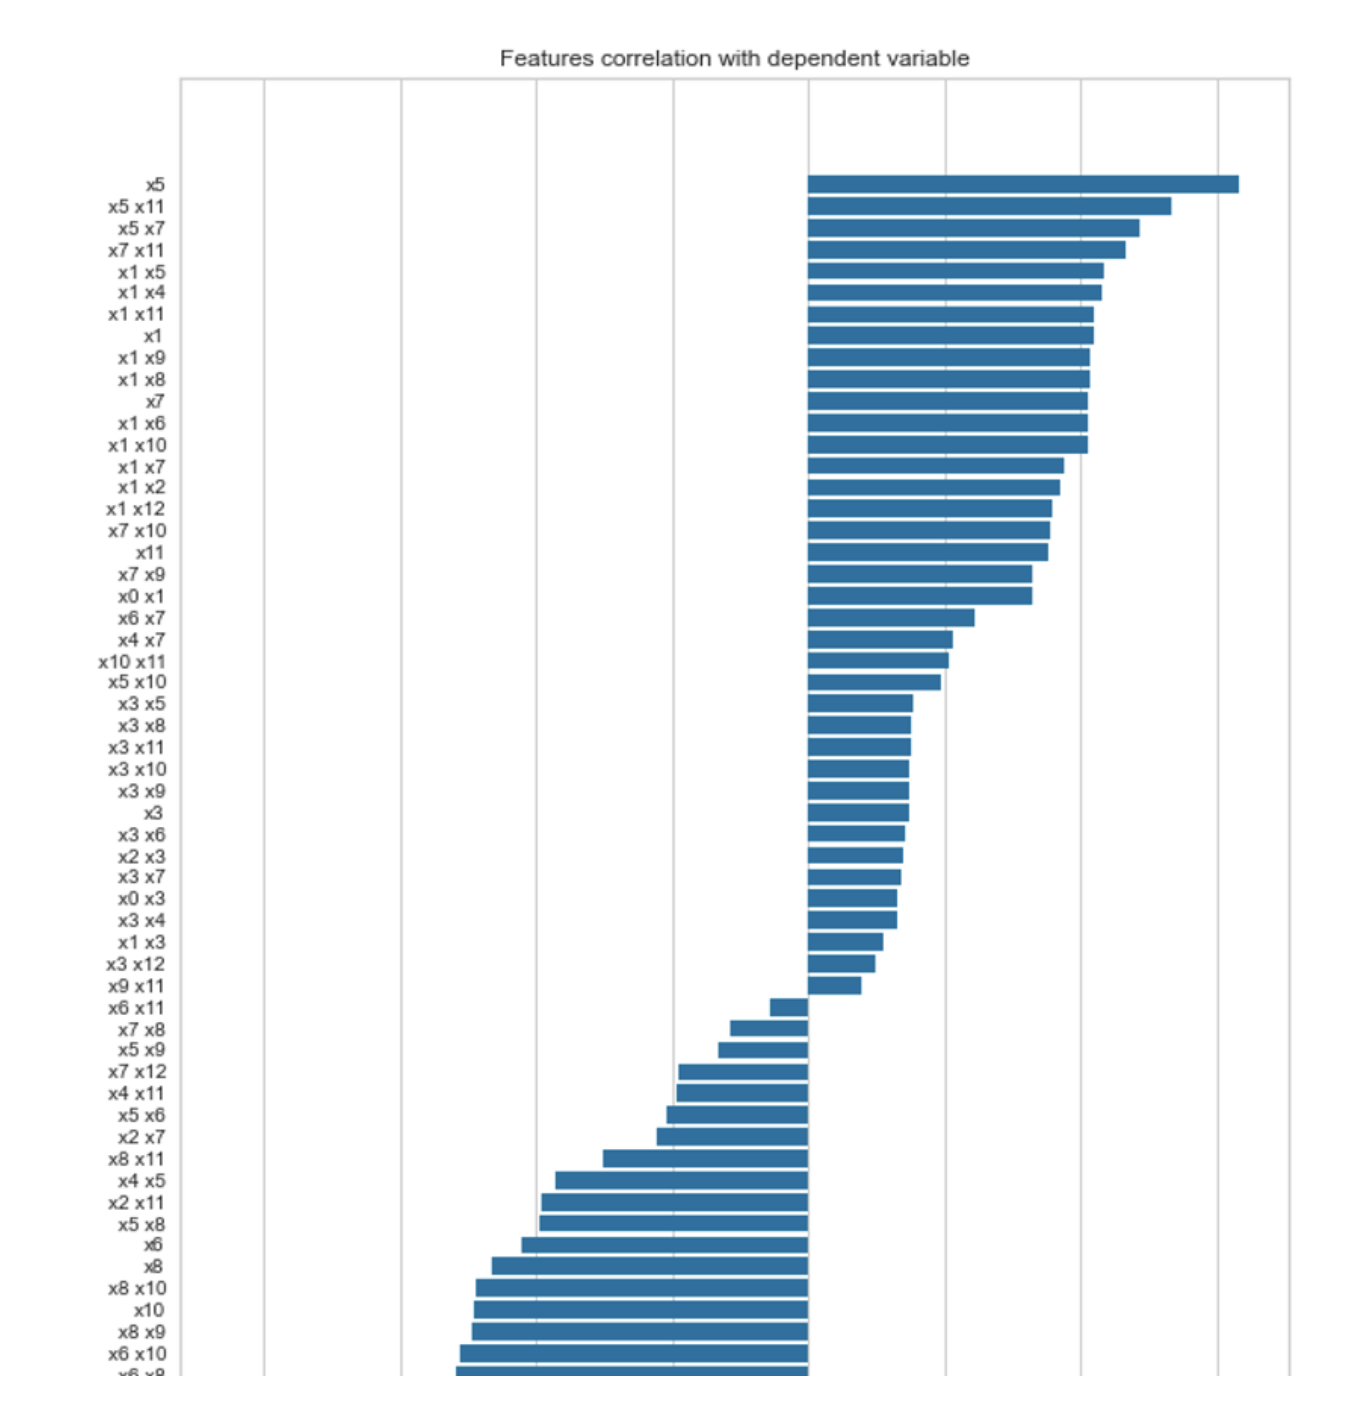

In [ ]:
# Visualizar la correlación de las variables originales + sus interacciones
# con la variable dependiente
# Ajustar tamaño de la gráfica
from matplotlib import pyplot as plt 
from sklearn.feature_selection import FeatureCorrelation

fig, ax = plt.subplots(figsize=(10,20))
# Declarar el visualizador
visualizer = FeatureCorrelation(
            labels=nombres_columnas, # Agregar el nombre de las variables
            sort = True # Ordenar correlaciones )
visualizer.fit(X_train_log_poly, y_train_log) # Pasar los datos de entrenamiento
visualizer.show()

La visualización de las correlaciones muestra interacciones que tienen tanto correlaciones positivas como negativas con la variable dependiente. A continuación, se destacan algunos hallazgos clave:

#### Correlaciones Positivas
- La variable **número de habitaciones (X5)** tiene una correlación positiva de **0.63** con la variable dependiente.
- Sus interacciones con las variables **B (X11)** y **DIS (X7)** también presentan correlaciones positivas de **0.53** y **0.48**, respectivamente.

#### Correlaciones Negativas
- La variable **LSTAT** tiene una correlación negativa fuerte de **-0.82** con la variable dependiente.
- Además, sus interacciones con las variables **CRIM (X0)**, **RAD (X8)**, **AGE (X6)**, **INDUS (X2)**, **NOX (X4)**, **RM (X5)** y **TAX (X9)** muestran correlaciones negativas significativas, todas menores a **-0.67**. Estas interacciones son buenos candidatos para mejorar las predicciones del modelo.

#### Correlaciones Insignificantes
- Algunas interacciones, como **AGE (X6)** con **B (X11)** y **TAX (X9)** con **B (X11)**, tienen correlaciones muy pequeñas de **0.07** y **-0.05**, respectivamente. Estas variables probablemente solo agregan ruido al modelo, degradando su desempeño o aportando poco a la mejora del error de generalización.

#### Recomendaciones
- **Eliminación de Variables con Baja Correlación**: Se recomienda eliminar interacciones o variables con correlaciones bajas utilizando un punto de corte, como **0.10** o **0.20**, para reducir el ruido y mejorar la eficiencia del modelo.
- **Enfoque en Variables Relevantes**: Priorizar las variables e interacciones con correlaciones altas (positivas o negativas) para optimizar las predicciones del modelo.

Este análisis permite identificar las variables más relevantes y tomar decisiones informadas para mejorar el desempeño del modelo de predicción.

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


def eta_squared(x_cat, y_cont):
    groups = [y_cont[x_cat == cat] for cat in np.unique(x_cat)]
    grand_mean = np.mean(y_cont)
    ss_between = sum(
        len(group) * (np.mean(group) - grand_mean) ** 2 for group in groups
    )
    ss_total = sum((y_cont - grand_mean) ** 2)
    return ss_between / ss_total


def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)


def auto_correlation(X_col, y):
    try:
        x_is_num = is_numeric(X_col)
        y_is_num = is_numeric(y)

        if x_is_num and y_is_num:
            corr, _ = pearsonr(X_col, y)
            return "pearson", corr

        elif not x_is_num and y_is_num:
            return "eta_squared", eta_squared(X_col, y)

        elif x_is_num and not y_is_num:
            le = LabelEncoder()
            y_encoded = le.fit_transform(y)
            fval, _ = f_oneway(
                *[X_col[y_encoded == cls] for cls in np.unique(y_encoded)]
            )
            return "f_score_anova", fval

        elif not x_is_num and not y_is_num:
            return "cramers_v", cramers_v(X_col, y)

    except Exception as e:
        return "error", np.nan


def normalize_strength(method, value, y):
    try:
        if method == "pearson":
            return abs(value)
        elif method == "eta_squared":
            return value
        elif method == "cramers_v":
            return value
        elif method == "f_score_anova":
            k = len(np.unique(y))
            n = len(y)
            if value > 0:
                return (value * (k - 1)) / (value * (k - 1) + (n - k))
            else:
                return 0
        else:
            return np.nan
    except:
        return np.nan


def compute_feature_correlations(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    results = []

    for col in X.columns:
        method, value = auto_correlation(X[col], y)
        strength = normalize_strength(method, value, y)
        results.append(
            {
                "Feature": col,
                "Method": method,
                "Correlation": value,
                "Strength": strength,
            }
        )

    result_df = pd.DataFrame(results)
    return result_df.sort_values(by="Strength", ascending=False)


# Dataset de prueba
df = pd.DataFrame(
    {
        "Color": ["Rojo", "Azul", "Rojo", "Verde", "Azul", "Verde"],
        "Peso": [1.1, 2.3, 1.3, 3.5, 2.1, 3.1],
        "Tamaño": ["S", "M", "S", "L", "M", "L"],
        "Clase": ["A", "B", "A", "C", "B", "C"],
    }
)

# Separar X e y
X = df[["Color", "Peso", "Tamaño"]]
y = df["Clase"]

# Calcular correlaciones
correlation_table = compute_feature_correlations(X, y)
print(correlation_table)

  Feature         Method  Correlation  Strength
0   Color      cramers_v     1.000000  1.000000
2  Tamaño      cramers_v     1.000000  1.000000
1    Peso  f_score_anova    55.166667  0.973529


### Selección de Variables: Eliminación de Predictores Altamente Correlacionados

Un enfoque común para la selección de variables es eliminar aquellos predictores que presentan una correlación perfecta o casi perfecta (por ejemplo, mayor a |0.95|). Este tipo de variables suelen aportar información redundante, por lo que su eliminación no afecta la capacidad predictiva del modelo. Además, en modelos como la regresión lineal, la multicolinealidad puede generar inestabilidad en los coeficientes, afectando negativamente el desempeño del modelo.

#### Detección de Correlaciones Altas

Para identificar estas correlaciones, se puede utilizar la herramienta de visualización **Rank2D** de la biblioteca **Yellowbrick**, que genera un mapa de calor de las correlaciones entre los predictores. Esta herramienta permite analizar visualmente las relaciones lineales entre las variables.

##### Pasos para Utilizar Rank2D:
1. **Declarar el objeto Rank2D**:  
    ```python
    visualizer = Rank2D(algorithm="pearson")
    ```
2. **Ajustar el visualizador con los datos de entrenamiento**:  
    ```python
    visualizer.fit(X, y)
    ```
3. **Transformar los datos**:  
    ```python
    visualizer.transform(X)
    ```
4. **Mostrar la gráfica**:  
    ```python
    visualizer.show()
    ```

#### Interpretación del Mapa de Calor

En el mapa de calor, cada cuadro representa la correlación de Pearson entre un par de variables:
- **Colores rojos**: Indican correlaciones positivas.
- **Colores azules**: Indican correlaciones negativas.
- **Colores cercanos al blanco**: Indican correlaciones bajas o insignificantes.

En este caso, no se observan variables con correlaciones absolutas entre |0.95| y |1|, por lo que no es necesario eliminar ninguna variable en este momento. Sin embargo, es importante tener en cuenta que este método no detecta correlaciones no lineales, lo que puede ser una limitación.

#### Aplicación a Variables con Interacciones

Si aplicamos este método a las variables que incluyen interacciones, es posible observar correlaciones altas inducidas manualmente. Estas correlaciones deben interpretarse en conjunto con las variables originales, ya que reflejan relaciones complejas que podrían ser relevantes para el modelo.

#### Reflexión

La eliminación de predictores altamente correlacionados es una técnica útil para simplificar el modelo y reducir el ruido. Sin embargo, es importante complementar este análisis con otras técnicas que permitan identificar relaciones no lineales o interacciones relevantes entre las variables.

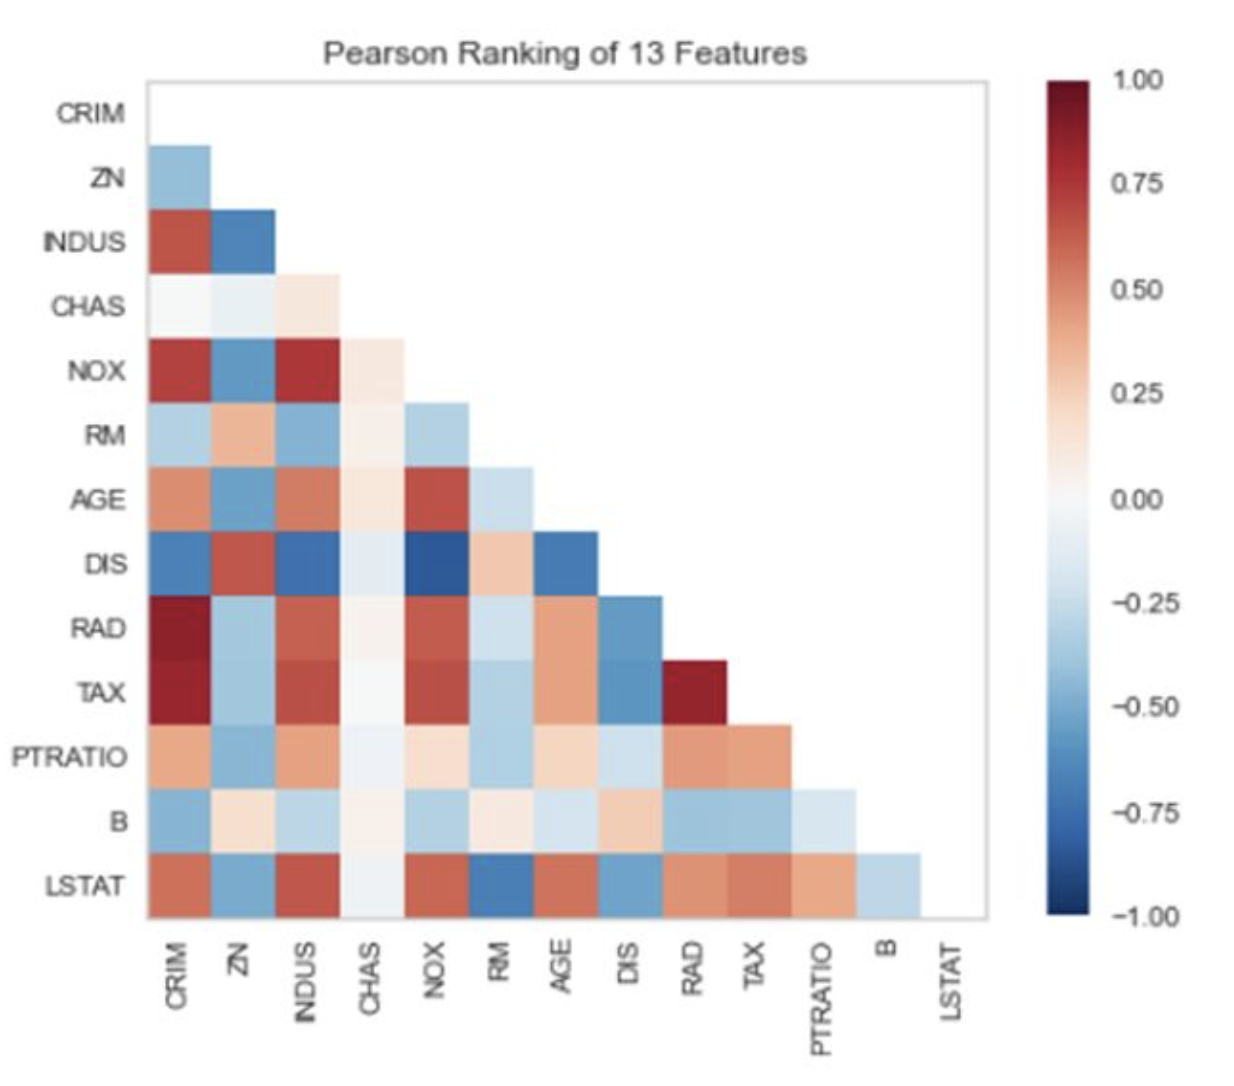

In [ ]:
from yellowbrick.features import Rank2D

# Graficar las correlaciones de los predictores
visualizer = Rank2D(algorithm="pearson")
# Calcular correlaciones
visualizer.fit(X_train_log, y_train_log)
visualizer.transform(X_train_log)
# Graficar
visualizer.show()

### Recursive Feature Elimination (RFE)

El método de **Eliminación Recursiva de Características (RFE)** es una técnica popular para la selección de variables en modelos de aprendizaje supervisado. Este algoritmo selecciona las variables más relevantes eliminando iterativamente aquellas que tienen menor importancia en el modelo. El proceso general es el siguiente:

1. Ajustar un modelo inicial con todas las variables.
2. Calcular los coeficientes o la importancia de cada variable.
3. Ordenar las variables según su relevancia.
4. Eliminar las variables menos importantes.
5. Repetir los pasos anteriores con el nuevo subconjunto de variables hasta alcanzar el número deseado de predictores.

Este método permite identificar el conjunto óptimo de variables que minimizan el error del modelo, mejorando su desempeño y reduciendo el ruido.

#### Parámetros del Algoritmo

El algoritmo RFE requiere dos parámetros principales:
- **Modelo especificado**: El modelo base que se utilizará para evaluar la importancia de las variables.
- **Número mínimo de variables**: El número deseado de variables a seleccionar.

Además, es recomendable utilizar **validación cruzada** para evaluar el modelo y seleccionar el número óptimo de variables.

#### Implementación con RFECV de Yellowbrick

La biblioteca **Yellowbrick** proporciona una herramienta visual llamada `RFECV` que facilita la implementación de RFE con validación cruzada. Esta herramienta permite:
- Visualizar el error del modelo en función del número de variables seleccionadas.
- Determinar el número óptimo de variables mediante validación cruzada.
- Mostrar la variabilidad del error utilizando diferentes subconjuntos de variables.

##### Principales Parámetros de RFECV:
- **`visualizer = RFECV()`**: Declara el objeto para realizar la eliminación recursiva con validación cruzada.
- **`scoring='neg_root_mean_squared_error'`**: Especifica la métrica de evaluación (en este caso, el RMSE negativo).
- **`cv=10`**: Define el número de folds para la validación cruzada.
- **`visualizer.fit(X_train_log, y_train_log)`**: Ajusta el visualizador con los datos de entrenamiento.

#### Beneficios de RFE
- **Reducción de complejidad**: Elimina variables irrelevantes o redundantes, simplificando el modelo.
- **Mejora del desempeño**: Selecciona las variables más relevantes, reduciendo el error de generalización.
- **Interpretabilidad**: Facilita la interpretación del modelo al trabajar con un subconjunto más pequeño de variables.

El uso de RFE, combinado con herramientas como RFECV, permite optimizar el modelo de manera eficiente y visualmente intuitiva.


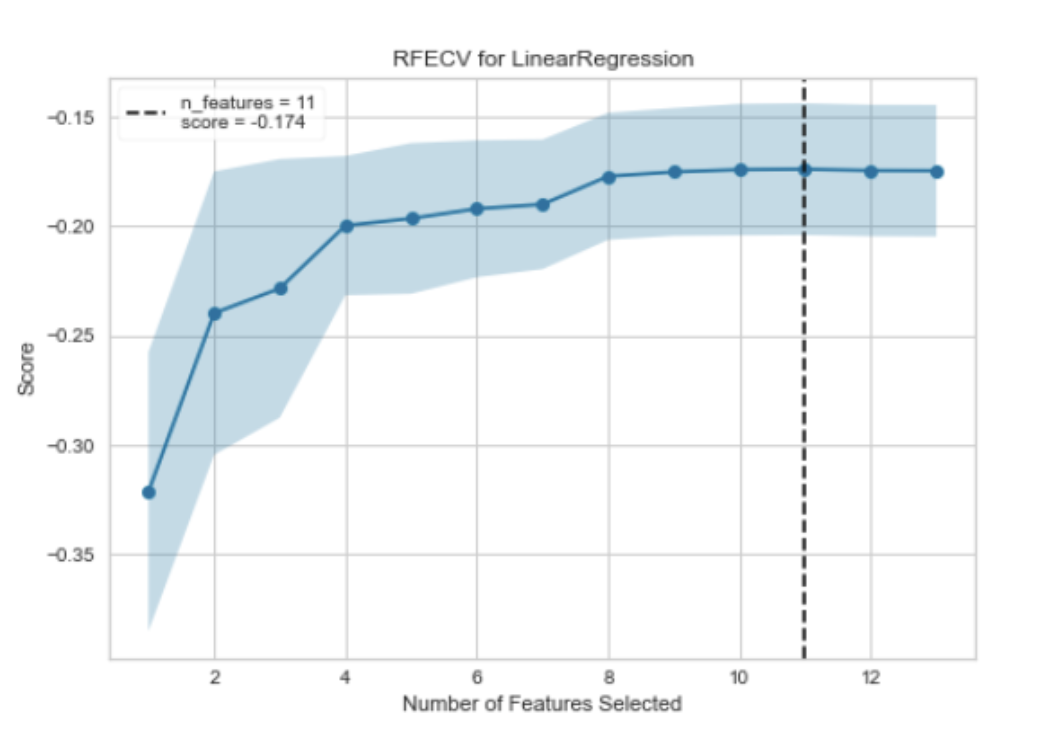

In [ ]:
from yellowbrick.model_selection import RFECV

# Declarar el modelo
visualizer = RFECV(
    # Pasar un modelo (estimator)
    linear_reg,
    # Escoger métrica de error
    scoring="neg_root_mean_squared_error",
    # Seleccionar k-folds de validación cruzada
    cv=10,
)
# Pasar datos de entrenamiento
visualizer.fit(X_train_log, y_train_log)
# Graficar
visualizer.show("figs/recursive_feature_elimination.png")

### Análisis de la Gráfica de Selección de Variables

La siguiente gráfica muestra el resultado del proceso de selección de variables utilizando las variables originales transformadas en escala logarítmica. En el eje **y** se encuentra el negativo de la raíz del error cuadrático medio (RMSE), mientras que en el eje **x** se representa el número de variables seleccionadas. La línea vertical negra indica el número óptimo de variables determinado mediante validación cruzada. Los intervalos en color azul representan la incertidumbre del error alrededor de cada número de variables. En este caso, el número óptimo de predictores es **11 de 13**.

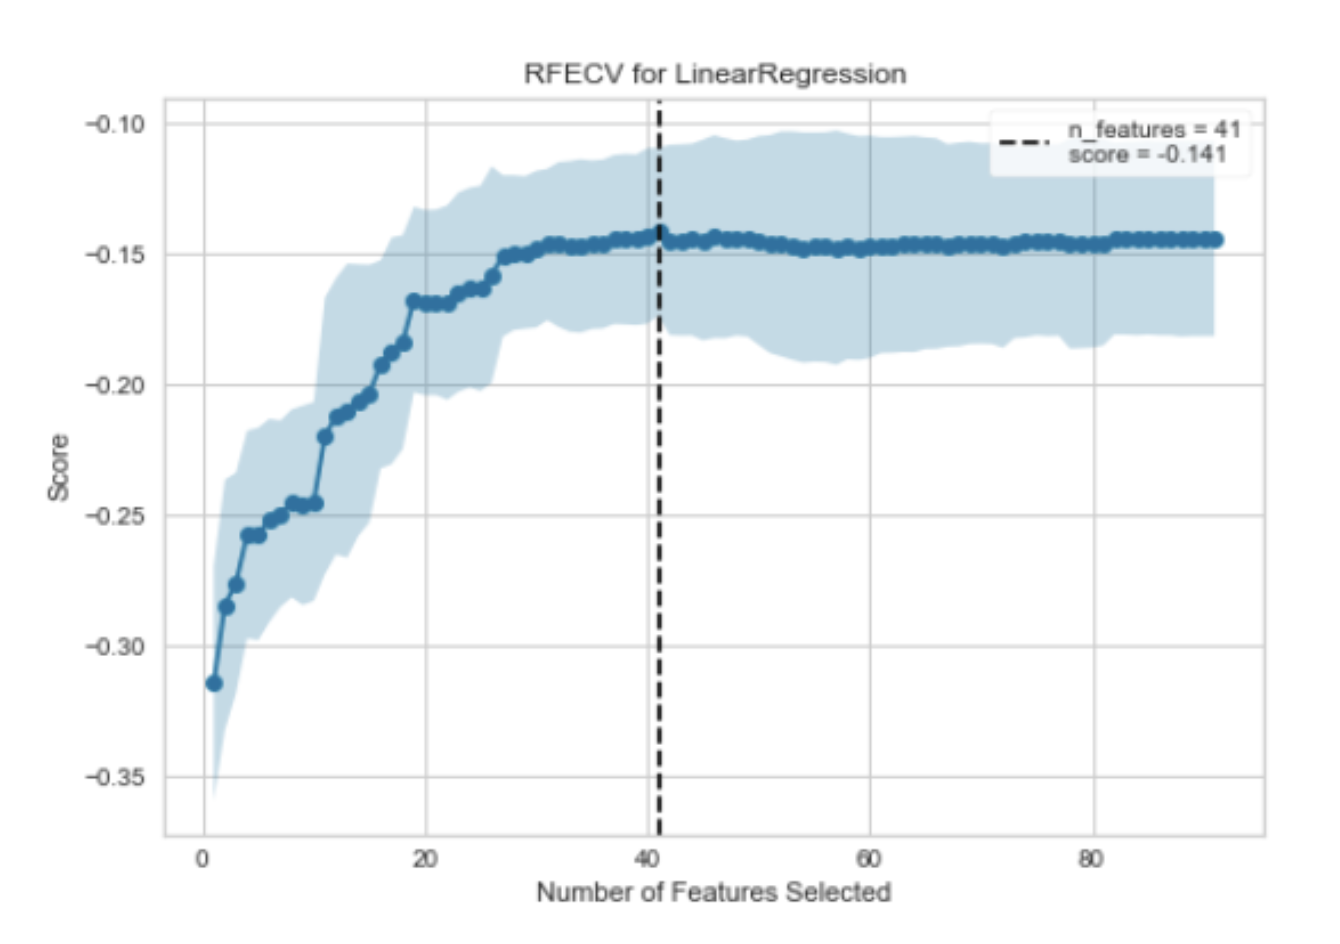

#### Interpretación de la Gráfica
- **Negativo del RMSE**: Recuerda que la visualización utiliza el negativo del RMSE, por lo que el punto óptimo corresponde al valor más alto de la gráfica.
- **Número óptimo de variables**: El algoritmo selecciona 11 variables como las más relevantes para minimizar el error de generalización.

#### Variables Eliminadas
El algoritmo sugiere eliminar las variables **ZN** y **AGE**, lo cual se puede verificar con el siguiente código:



## Regularizacion L1 y L2

## Introducción

Para entrenar un modelo de predicción de precios de casas que sea preciso y consistente, no basta con lograr un balance entre sesgo y varianza; también es fundamental crear nuevas y mejores variables. Este proceso es iterativo y no existe una receta única para lograrlo. En este contexto, es crucial analizar la **regularización de modelos**.

La regularización es un método efectivo para reducir la varianza del modelo y, por ende, el error de generalización. En esencia, la regularización disminuye la complejidad del modelo, evitando que este aprenda del ruido en los datos o memorice patrones irrelevantes. 

El grado de regularización se controla mediante **hiperparámetros**, que son parámetros definidos antes del proceso de optimización. Estos hiperparámetros varían según el algoritmo y su función específica.

### Tipos de Regularización

En problemas de regresión lineal, existen dos tipos principales de regularización:

1. **Regularización L1 (Regresión Lasso):**  
    Este método tiende a reducir algunos coeficientes a cero, eliminando efectivamente predictores irrelevantes. Es útil para la selección de variables.

2. **Regularización L2 (Regresión Ridge):**  
    Este método penaliza los coeficientes grandes, reduciendo su magnitud pero sin eliminarlos. Es ideal para manejar multicolinealidad y mejorar la estabilidad del modelo.

Ambos métodos son fundamentales porque su intuición se aplica en otros algoritmos, aunque con especificaciones diferentes. Sin embargo, es importante destacar que estos métodos reducen la varianza del modelo a costa de un aumento en el sesgo. Por ello, es clave encontrar el grado óptimo de regularización.

### Escalado de Datos

Los métodos de regularización L1 y L2 son sensibles a la escala de los datos. Por ejemplo, si un predictor está en pesos y se convierte a miles de pesos, el coeficiente asociado tendrá un impacto diferente en la penalización del modelo. Para evitar este problema, es necesario **estandarizar los datos** (media 0 y desviación estándar 1) antes de aplicar la regularización. Esto se puede lograr con el siguiente código:


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures


def preprocess_data(X_train, X_val, X_test):
    """Regresa los conjuntos de entrenamiento, validacion y prueba estandarizados con media 0 y desviacion estandar 1
    Parametros:
    ------------------------------------
    X_train: Conjunto de entrenamiento
    X_val: Conjunto de validacion
    X_test: Conjunto de prueba

    Retorna:
    ------------------------------------
    Dataframes con conjuntos estandarizados."""
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return (X_train_scaled, X_val_scaled, X_test_scaled)


# Seleccionar las variables (todas)
col_names = []
variable_selection = col_names

# Estandarizar los conjuntos
X_train_prep, X_val_prep, X_test_prep = preprocess_data(
    X_train.loc[:, variable_selection],
    X_val.loc[:, variable_selection],
    X_test.loc[:, variable_selection],
)

Regularización Ridge (L1)

La regularización Ridge tiene el objetivo de penalizar el modelo de Mínimos Cuadrados Ordinarios (MCO), cuando los coeficientes del modelo son muy grandes, y lo hace a través de la siguiente fórmula:

La penalización consiste en añadir a la función objetivo de MCO un término, que es la suma de los coeficientes al cuadrado, como consecuencia, los coeficientes beta se encogen hacia cero en el proceso de optimización de la función objetivo, y lo hace por medio de la fórmula:

Lamba (λ) es el hiperparámetro de regularización que permite controlar la magnitud de penalización, por su parte, el sklearn λ está parametrizada al igual que alpha (α). A continuación, observa sus significados.

λ⟶0: Los resultados del proceso de optimización son iguales a MCO.
λ⟶∞: Los coeficientes tenderán a cero y el modelo al promedio de la variable.


A continuación, te mostramos cómo se implementa el modelo Ridge en el problema de precios de casas con los datos transformados en escala logarítmica. Haz clic en cada recuadro para ver la información. 

ridge = Ridge() : Permite declarar el modelo.
alpha = 1 : Permite fijar el parámetro de regularización lambda.
normalize = True : Permite estandarizar los datos con media 0, y desviación estándar 1.
ridge.fit(X_train, y_train): Permite ajustar los parámetros de la regresión con los datos de entrenamiento.
ridge.predict(X_test): Permite predicir con el modelo entrenado.

El modelo Ridge con 𝜆 = 1, el RMSE de validación y prueba es de 0.22 y 0.20 miles/USD, respectivamente. Al comparar los modelos anteriores, el error es más grande, sin embargo, no se ha elegido la 𝜆 óptima que minimiza el error.

Ahora, examina cómo se comportan los coeficientes de la regresión Ridge para distintos valores del parámetro de regularización. Para ello, puedes utilizar la función plot_coef_regularization, que permite ajustar n modelos de regresión ridge, cada uno con una 𝜆 diferente, extraer y graficar los coeficientes de cada iteración.

 - Error promedio de validación (RMSE): 0.2269
​ - Error promedio de prueba (RMSE): 0.2013

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Crear dataset artificial con 100 observaciones y 10 características
X, y = make_regression(n_samples=100, n_features=10, noise=15, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para tener nombres de columnas
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X_train_log = pd.DataFrame(X_scaled, columns=feature_names)
y_train_log = pd.Series(y, name="target")

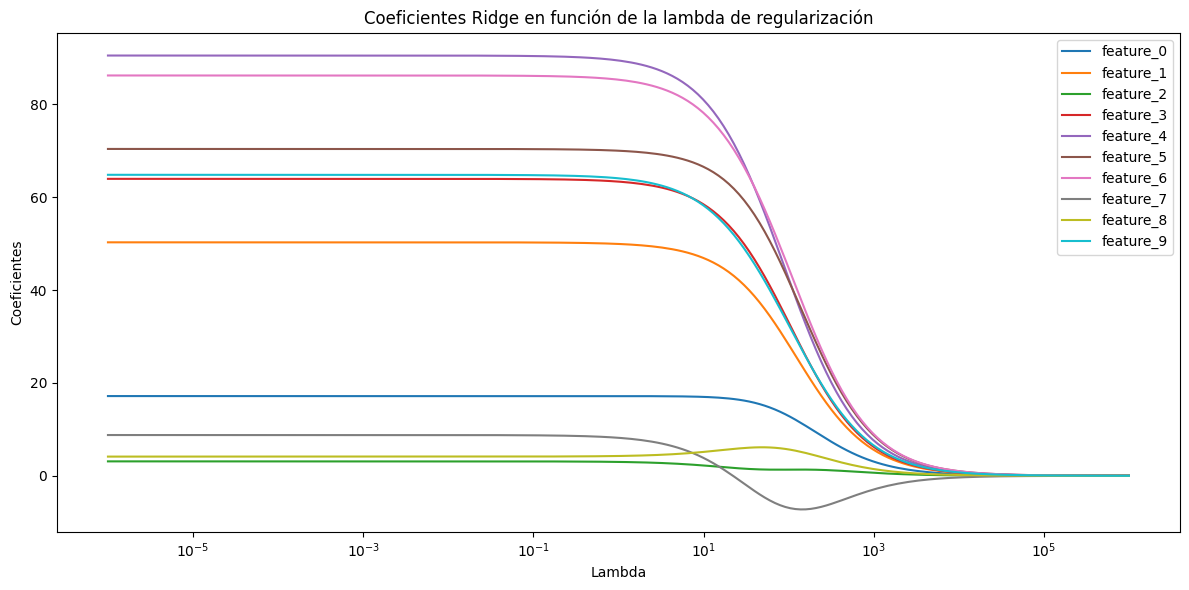

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


def plot_coef_regularization(
    model, lambdas, X_train, y_train, coef_names=None, title=""
):
    """
    Genera una gráfica de los coeficientes del modelo en función de la lambda de regularización.

    Parameters
    ----------
    model : objeto de sklearn (ej. Ridge o Lasso)
        Modelo de regresión con regularización.

    lambdas : array-like
        Lista o arreglo de valores de lambda (alpha) para probar.

    X_train : DataFrame o array
        Matriz de características ya estandarizadas.

    y_train : Series o array
        Variable objetivo correspondiente al conjunto de entrenamiento.

    coef_names : list o None
        Nombres de las variables (columnas) para usar en la gráfica. Si es None, se asignan índices.

    title : str
        Título de la gráfica.

    Returns
    -------
    None
    """
    coefs = []

    for alpha in lambdas:
        model.set_params(alpha=alpha)
        model.fit(X_train, y_train)
        coefs.append(model.coef_)

    # Usar nombres de columnas o índices si no se especifican
    if coef_names is None:
        coef_names = [f"coef_{i}" for i in range(X_train.shape[1])]

    df_coefs = pd.DataFrame(coefs, columns=coef_names)
    df_coefs["lambda"] = lambdas

    # Graficar
    ax = df_coefs.plot(
        x="lambda",
        title=title,
        ylabel="Coeficientes",
        xlabel="Lambda",
        logx=True,
        figsize=(12, 6),
    )

    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"coef_regularization_{type(model).__name__}.png")


# Crear conjunto de 200 lambdas entre 10^-6 y 10^6
lambdas = np.logspace(-6, 6, 200)

# Instanciar modelo Ridge sin normalize (asumiendo X_train_log ya estandarizado)
ridge = Ridge()

# Graficar coeficientes del modelo Ridge
plot_coef_regularization(
    model=ridge,
    lambdas=lambdas,
    X_train=X_train_log,
    y_train=y_train_log,
    coef_names=X_train_log.columns,
    title="Coeficientes Ridge en función de la lambda de regularización",
)

El código presentado permite realizar un análisis detallado del comportamiento de los coeficientes del modelo Ridge en función del parámetro de regularización λ (lambda). A continuación, se describen los pasos clave y los resultados obtenidos:

#### Pasos del Código:
1. **Generación de un Arreglo de Lambdas**:  
    Se crea un arreglo de 200 valores de λ distribuidos logarítmicamente entre 0.1 y 1,000,000. Este rango amplio permite explorar el mejor valor de λ para el modelo.

2. **Uso del Modelo Ridge**:  
    En cada iteración, se utiliza un estimador Ridge para ajustar el modelo con los datos de entrenamiento estandarizados (media 0 y desviación estándar 1).

3. **Ajuste de Modelos y Extracción de Coeficientes**:  
    Se ajustan múltiples modelos Ridge, cada uno con un valor diferente de λ, y se extraen los coeficientes correspondientes.

4. **Visualización de los Coeficientes**:  
    Se grafica el comportamiento de los coeficientes en función de λ. En el eje **y** se muestra el tamaño de los coeficientes, mientras que en el eje **x** se representa λ en escala logarítmica para facilitar la interpretación. Cada línea de color corresponde a un coeficiente de un predictor.

#### Observaciones de la Gráfica:
- **Comportamiento de los Coeficientes**:  
  A medida que λ aumenta, los coeficientes tienden a encogerse hacia cero, pero nunca llegan exactamente a cero. Esta es una propiedad distintiva de la regularización Ridge.  
  - En el extremo izquierdo (λ cercano a 0), los coeficientes son equivalentes a los obtenidos con Mínimos Cuadrados Ordinarios (MCO).  
  - A medida que λ aumenta, los coeficientes se reducen progresivamente, y el modelo converge hacia el promedio de la variable dependiente.

- **Interpretación de λ**:  
  Un λ pequeño permite que el modelo ajuste más los datos, mientras que un λ grande reduce la complejidad del modelo, aumentando el sesgo pero disminuyendo la varianza.

#### Selección del Mejor λ:
Para seleccionar el valor óptimo de λ, se utiliza validación cruzada. El objetivo es encontrar el λ que minimice el error promedio de validación cruzada (RMSE). Esto se puede realizar de dos maneras:
1. **Uso de `cross_val_score`**:  
    Implementar un bucle `for` para probar diferentes valores de λ y calcular el error de validación cruzada.
2. **Uso de `RidgeCV`**:  
    Una forma más eficiente es utilizar `RidgeCV` de `sklearn`, que automatiza el proceso de validación cruzada. Solo es necesario proporcionar:
    - `alphas = lambdas`: Lista de valores de λ.
    - `cv = 10`: Número de particiones para validación cruzada.
    - `scoring = 'neg_root_mean_squared_error'`: Métrica de evaluación.

#### Resultados:
- El mejor modelo Ridge se obtiene con un λ de **0.011**, que minimiza el error promedio de validación cruzada (RMSE) a **0.1905 miles/USD**.
- Este valor de λ representa un balance óptimo entre sesgo y varianza, logrando un modelo que generaliza bien en datos no vistos.

#### Reflexión:
El análisis de regularización Ridge es fundamental para controlar la complejidad del modelo y evitar el sobreajuste. La selección adecuada de λ permite construir un modelo robusto y eficiente, capaz de realizar predicciones precisas en datos nuevos.


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Escalar X_train_log
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)

# Crear lambdas (alphas)
n_lambdas = 200
lambdas = np.logspace(-6, 6, n_lambdas)

# Crear modelo con validación cruzada
model = RidgeCV(alphas=lambdas, scoring="neg_root_mean_squared_error", cv=10)

# Ajustar el modelo
model.fit(X_train_scaled, y_train_log)

# Resultados
print(f"Mejor lambda: {np.round(model.alpha_, 4)}")
print(
    f"Error promedio de validación cruzada (RMSE): {np.round(-1 * model.best_score_, 2)}"
)

Mejor lambda: 0.0333
Error promedio de validación cruzada (RMSE): 15.5


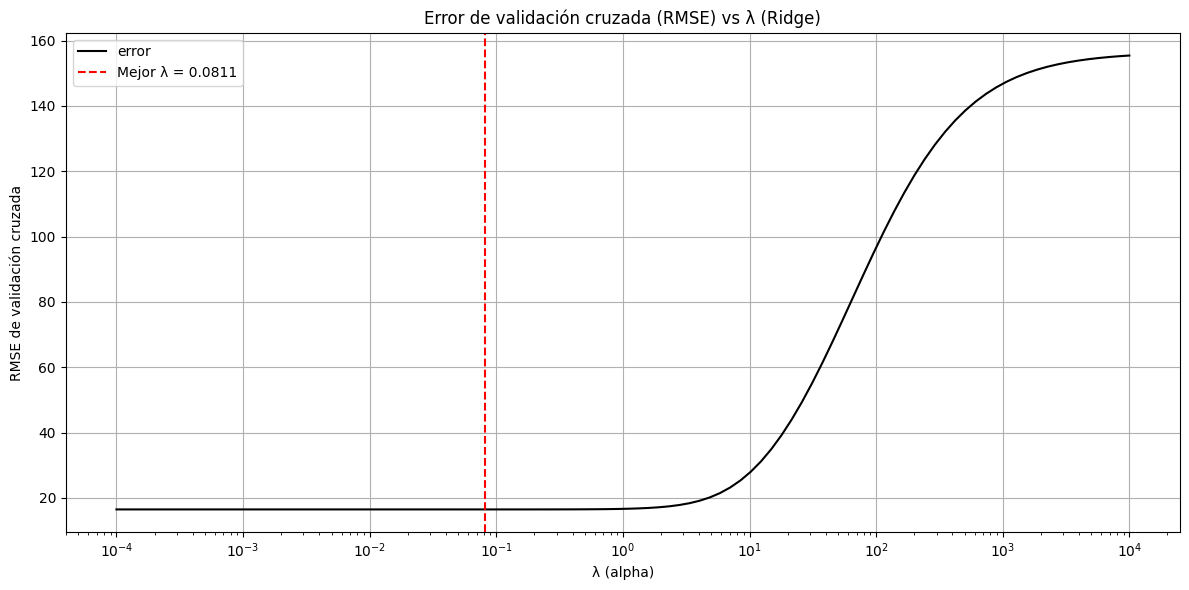

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


def plot_validation_error_vs_ridge_regularization(
    model, lambdas, X_train, y_train, cv, exp=False
):
    """
    Genera una gráfica con el error de validación RMSE como función del parámetro
    de regularización Ridge.
    """
    errors = []

    for alpha in lambdas:
        model.set_params(alpha=alpha)
        scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring="neg_root_mean_squared_error",
        )
        mean_score = -np.mean(scores)
        errors.append(mean_score)

    if exp:
        errors = np.exp(errors) - 1

    df_results = pd.DataFrame({"lambda": lambdas, "error": errors})

    ax = df_results.plot(
        x="lambda",
        y="error",
        logx=True,
        title="Error de validación cruzada (RMSE) vs λ (Ridge)",
        xlabel="λ (alpha)",
        ylabel="RMSE de validación cruzada",
        figsize=(12, 6),
        color="black",
        grid=True,
    )

    lambda_opt = df_results.loc[df_results.error.idxmin(), "lambda"]
    plt.axvline(
        x=lambda_opt,
        linestyle="dashed",
        color="red",
        label=f"Mejor λ = {lambda_opt:.4f}",
    )
    plt.legend()

    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"error_regularization_{type(model).__name__}.png")
    plt.show()


# === Crear y preparar datos ===

# Dataset artificial
X, y = make_regression(n_samples=100, n_features=10, noise=15, random_state=4)

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pasar a DataFrame con nombres
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X_train_log = pd.DataFrame(X_scaled, columns=feature_names)
y_train_log = pd.Series(y, name="target")

# === Aplicar la función ===

model = Ridge()
lambdas = np.logspace(-4, 4, 100)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

plot_validation_error_vs_ridge_regularization(
    model=model,
    lambdas=lambdas,
    X_train=X_train_log,
    y_train=y_train_log,
    cv=cv,
    exp=False,
)

En la gráfica, se observa en el eje **y** la raíz del error cuadrático medio (RMSE) y en el eje **x** los distintos valores del parámetro de regularización 𝜆 (lambda). La línea vertical roja indica el valor óptimo de regularización, 𝜆 = 0.011, que minimiza la función objetivo. Este valor representa el balance ideal entre sesgo y varianza.

A medida que se incrementa la penalización en el modelo de Mínimos Cuadrados Ordinarios (MCO), hasta alcanzar este valor óptimo de 𝜆, se logra reducir la varianza del modelo. Sin embargo, en este caso, la mejora obtenida es marginal.

Por otro lado, al seleccionar valores de 𝜆 superiores al óptimo, el sesgo del modelo aumenta significativamente, lo que provoca un incremento en el RMSE de prueba. Esto resalta la importancia de elegir cuidadosamente el valor de 𝜆 para garantizar un modelo que generalice adecuadamente en datos no vistos.


### Regularización Lasso (L2)